<a href="https://colab.research.google.com/github/myihbach/Statistical_Learning_labs/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP 3 : Regression lineaire**
Done by : 
*   IHBACH Mohamed Yassine
*   KHOUDRAJI Wissale
*   TAHERI Oumaima




# **Partie 1** : Régression linéaire à une variable 

Dans cette partie, on s’intéresse à  un modèle simple Y = α * X_1 + ε et on suppose que X et  ε  sont des variables aléatoires gaussiennes de même variance et moyenne,  générées par la commande  npr.normal.

In [ ]:
import numpy as np 
import numpy.random as npr
from numpy import corrcoef
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import seaborn


### Question 1 : Generation de la matrice X(1000,3)

In [ ]:
X = npr.normal(size=(1000, 3))
alpha = 2
Y = alpha * X[:,0] + X[:, 2]
print("Dimension de X : ",X.shape)
print("Dimension de Y : ",Y.shape)

Dimension de X :  (1000, 3)
Dimension de Y :  (1000,)


### **Question 2** : : Matrice de correlation

In [ ]:
corrcoef(X.T)

array([[ 1.        , -0.00929736, -0.03846949],
       [-0.00929736,  1.        , -0.02068286],
       [-0.03846949, -0.02068286,  1.        ]])

Les elements non diagonaux sont tres faibles ce qui signifie que les variables X1 , X2 et epsilon sont independantes.

**Question 3 :** 

In [ ]:
model = OLS(Y,X[:, :2])
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              6268.
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                        0.00
Time:                        22:50:50   Log-Likelihood:                         -1437.6
No. Observations:                1000   AIC:                                      2879.
Df Residuals:                     998   BIC:                                      2889.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9941      0.032     62.673      0.000       1.932       2.057
x2             3.0960      0.033     94.381      0.000       3.032       3.160
==============================================================================
Omnibus:                        3.672   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.736
Skew:                           0.136   Prob(JB):                        0.154
Kurtosis:                       2.875   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation :**
En visualisant les résultats obtenus , la p_value de X1 est nulle donc son coefficient est non nul . Contrairement a la p_value de X2 qui est tres grande , ce qui nous mene à ne pas rejeter l'hypothese nulle donc son coefficient est nul.

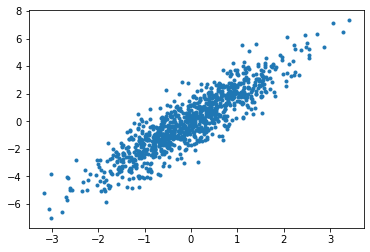

In [ ]:
plt.scatter(X[:,0],Y,marker='.')

**Question 4:**
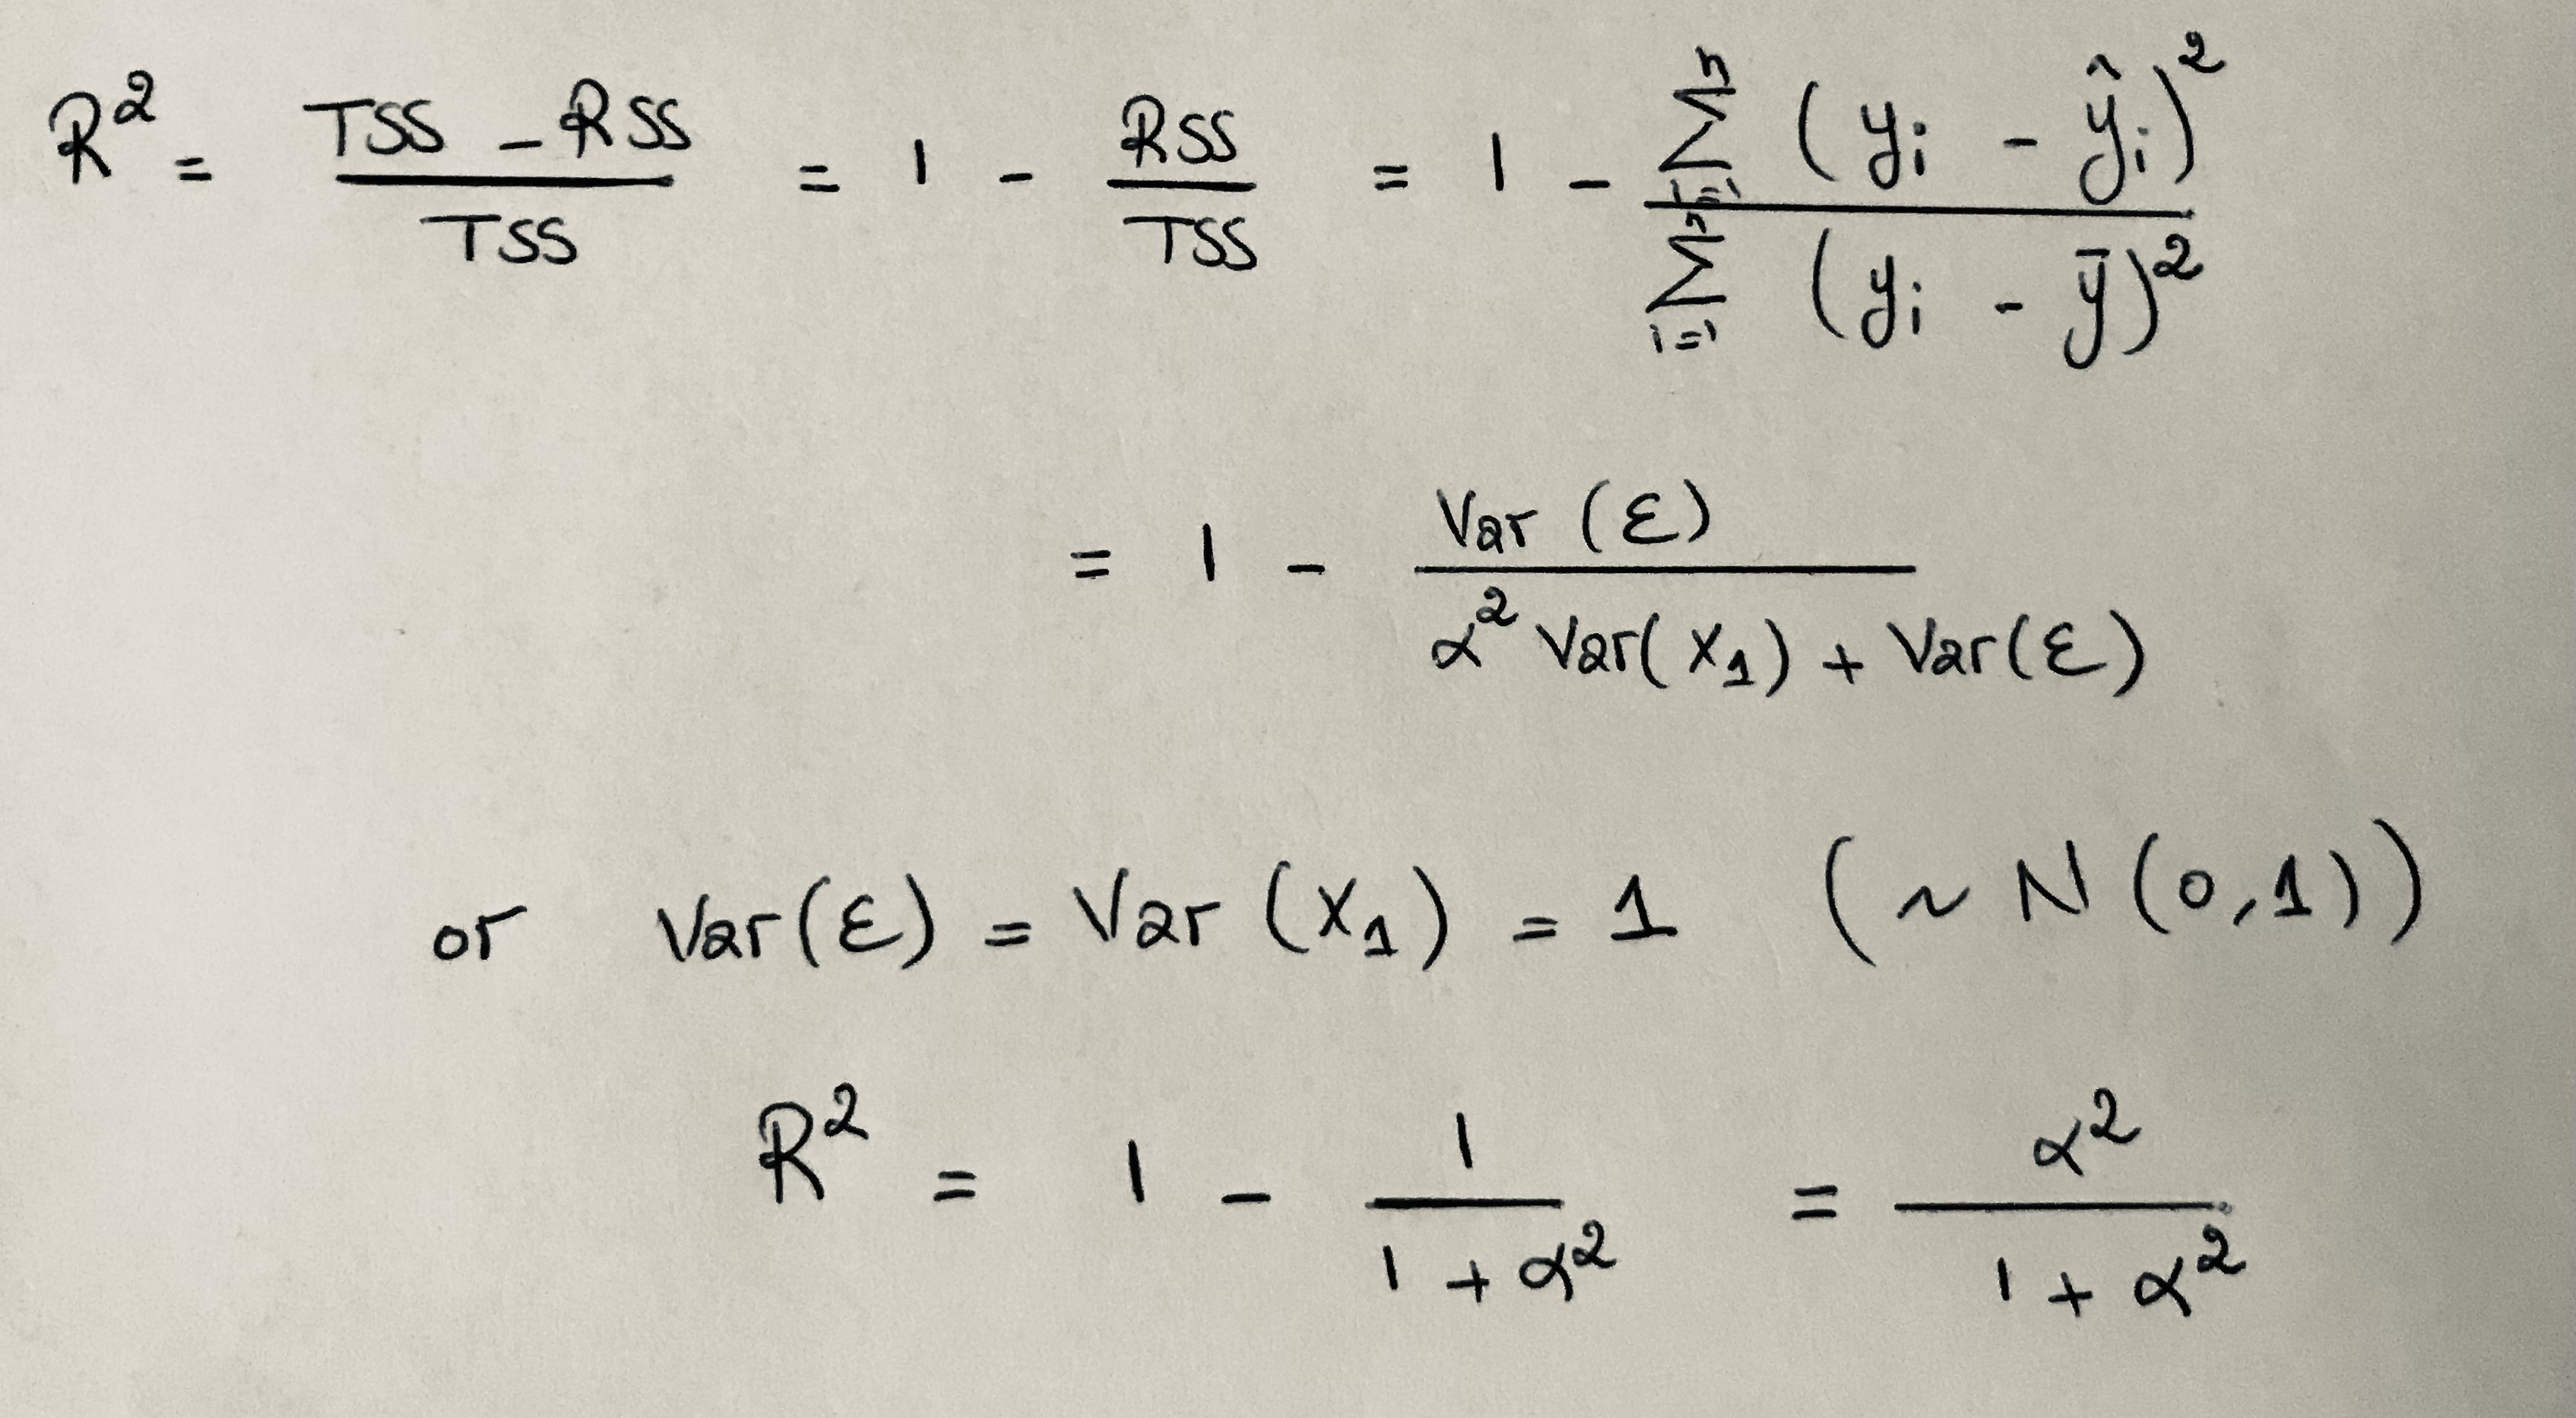


**Question 5:** 
R_squared pour differentes α

In [ ]:
alphas = np.arange(0,5,0.1)
R_squared_pratique = []
for a in alphas:
    Y = a*X[:,0] + X[:, 2]
    model = OLS(Y,X[:, :2])
    results = model.fit()
    np.append(alphas,[a])
    R_squared_pratique.append(results.rsquared)
R_squared_theorique = [ a**2 / ( 1 + a**2) for a in alphas]


**Question 6 :**

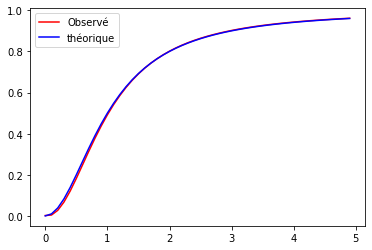

In [ ]:
plt.plot(alphas, R_squared_pratique,'r', label='Observé')
plt.plot(alphas, R_squared_theorique,'b', label='théorique')
plt.legend();

# **Partie 2 :** Régression à deux variables 

### **Question 7:** Generation de la matrice X(1000,3)
### Pour **Y=α*X_1+β*X_2+ε**

In [ ]:
X = npr.normal(size=(1000, 3))
alpha = 2
beta = 3
Y = alpha * X[:,0] + beta * X[:,1] + X[:, 2]
print("Dimension de X : ",X.shape)
print("Dimension de Y : ",Y.shape)

Dimension de X :  (1000, 3)
Dimension de Y :  (1000,)


### **Question 8:**

In [ ]:
corrcoef(X.T)
model = OLS(Y,X[:, :2])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              6268.
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                        0.00
Time:                        22:51:15   Log-Likelihood:                         -1437.6
No. Observations:                1000   AIC:                                      2879.
Df Residuals:                     998   BIC:                                      2889.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9941      0.032     62.673      0.000       1.932       2.057
x2             3.0960      0.033     94.381      0.000       3.032       3.160
==============================================================================
Omnibus:                        3.672   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.736
Skew:                           0.136   Prob(JB):                        0.154
Kurtosis:                       2.875   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation :** Dans ces résultats , les p_values que nous avons obtenus sont nulles ce qui signifie que nous devons absolument rejeter les hypothèses nulles d'où les coefficients alpha et betta sont non nuls.